In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#imports do código

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

In [3]:
cls = Sequential()
cls.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
cls.add(BatchNormalization())

cls.add(MaxPooling2D(pool_size = (2, 2)))
cls.add(Flatten())

cls.add(Dense(units = 64, activation = 'relu'))
cls.add(Dropout(0.2))
cls.add(Dense(units = 64, activation = 'relu'))
cls.add(Dropout(0.2))
cls.add(Dense(units = 1, activation = 'sigmoid'))


cls.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
gerador_treinamento = ImageDataGenerator(rescale=1./255)

gerador_teste = ImageDataGenerator(rescale=1./255)

In [5]:
base_treinamento = gerador_treinamento.flow_from_directory('/content/drive/MyDrive/Curso Para Alunos/dataset2K/training_set',
                                                           target_size=(64, 64),
                                                           batch_size=32,
                                                           class_mode='binary'
                                                           )

base_teste = gerador_teste.flow_from_directory('/content/drive/MyDrive/Curso Para Alunos/dataset2K/test_set',
                                                          target_size=(64, 64),
                                                           batch_size=32,
                                                           class_mode='binary'
                                                            )

Found 2000 images belonging to 2 classes.
Found 633 images belonging to 2 classes.


In [6]:
cls.fit(base_treinamento, steps_per_epoch=64 ,epochs = 15,
        validation_data = base_teste, validation_steps = 64)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/64 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.5301 - loss: 1.2722 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 727s 10s/step - accuracy: 0.5333 - loss: 1.2418 - val_accuracy: 0.4724 - val_loss: 0.7016
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 165ms/step - accuracy: 0.6572 - loss: 0.6379 - val_accuracy: 0.5150 - val_loss: 0.6851
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.7393 - loss: 0.5306 - val_accuracy: 0.5624 - val_loss: 0.6753
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.8322 - loss: 0.3858 - val_accuracy: 0.5308 - val_loss: 0.7511
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.8963 - loss: 0.2635 - val_accuracy: 0.6335 - val_loss: 0.6334
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - accuracy: 0.9323 - loss: 0.1891 - val_accuracy: 0.5940 - val_loss: 0.7077
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.9497 - loss: 0.1335 - val_accuracy: 0.6303 - val_loss: 0.6820
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.9642 - loss: 0.1041 - val_accuracy: 0.6714

In [12]:
import matplotlib.pyplot as plt

imagem_teste = image.load_img('/content/download.jpg', target_size = (64, 64))
imagem_teste = image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)
previsao = cls.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


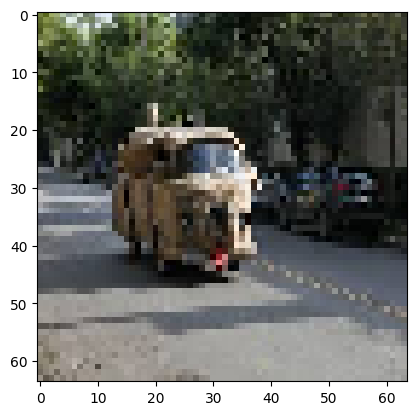

In [13]:
plt.imshow(imagem_teste[0])

In [14]:
if (previsao<=0.5):
  print('cachorro')
else:
  print('gato')

cachorro
